In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
files_path = 'C:/Users/Deng_/PycharmProjects/test_for_tedi/tedi-230412/datas/'
venue_info = pd.read_csv(files_path+'venue_info.csv')

In [7]:
import pymysql

db = pymysql.connect(
    host='localhost',
    user='root',
    password='ff2017',
    charset='utf8',
    database='tedi_data'
)

##### 通过sql快速获取密接人员的出行信息

In [8]:
## 获取密接者人员数据
q = '''
select * from result1'''
contact_info = pd.read_sql(q, con = db)
contact_info = contact_info[['密接场所ID','密接日期']]

C:\Users\Deng_\AppData\Local\Temp\ipykernel_21196\204747932.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  contact_info = pd.read_sql(q, con = db)


In [9]:
## 获取密接者人员的出行数据
q = '''
select * from contact_travel_info'''
con_travel_info = pd.read_sql(q, con=db)
con_travel_info = con_travel_info[['date','grid_id']]
con_travel_info

C:\Users\Deng_\AppData\Local\Temp\ipykernel_21196\67072235.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  con_travel_info = pd.read_sql(q, con=db)


,date,grid_id
0,2022-10-01 13:45:43,2285
1,2022-10-01 12:26:43,855
2,2022-10-01 14:02:43,2232
3,2022-10-02 11:17:35,397
4,2022-10-02 17:57:35,2285
...,...,...
2359789,2022-11-26 15:56:03,2143
2359790,2022-11-26 20:35:03,2055
2359791,2022-11-27 13:46:19,2816
2359792,2022-11-27 11:41:19,2179


##### 切片获取每一段时间的出行数据

In [10]:
sliced_travel_info = []
cur_time = pd.to_datetime('2022-09-30',format='%Y-%m-%d')
end = pd.to_datetime('2022-11-30',format='%Y-%m-%d')
time_list = []
while cur_time < end:
    this_end = cur_time + pd.Timedelta(days=10)
    if this_end == pd.to_datetime('2022-10-30',format='%Y-%m-%d') or this_end == pd.to_datetime('2022-11-30',format='%Y-%m-%d'): this_end += pd.Timedelta(days=1)
    time_list.append(this_end)

    mask = (con_travel_info['date']>=cur_time) & (con_travel_info['date']<=this_end)
    this = con_travel_info[mask]
    sliced_travel_info.append(this)
    cur_time = this_end

##### 获取分段后出行信息点坐标

In [11]:
### 定义函数： 给定key-->list，建立一个所有键值为 0 的字典
def todict(x):
    my_set = x
    my_dict = {key: 0 for key in my_set}
    return my_dict


grids_dict = todict(venue_info.grid_point_id.tolist())
grids_dict

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 123: 0,
 

##### 利用分段数据，获取每一段中每个地点的阳性人数

In [12]:
grids_dicts = []
for each in sliced_travel_info:
    grids_dict = todict(venue_info.grid_point_id.tolist()) ## 每读取一段时间数据，清空现有数据
    for i in each.index:
        gid = each['grid_id'][i]
        grids_dict[gid] += 1
    grids_dicts.append(grids_dict)
grids_dicts[1]

{1: 0,
 2: 113,
 3: 0,
 4: 0,
 5: 139,
 6: 43,
 7: 59,
 8: 46,
 9: 57,
 10: 60,
 11: 55,
 12: 184,
 13: 55,
 14: 67,
 15: 83,
 16: 63,
 17: 71,
 18: 40,
 19: 59,
 20: 76,
 21: 122,
 22: 78,
 23: 143,
 24: 60,
 25: 74,
 26: 93,
 27: 51,
 28: 60,
 29: 43,
 30: 60,
 31: 49,
 32: 109,
 33: 27,
 34: 122,
 35: 47,
 36: 79,
 37: 224,
 38: 56,
 39: 28,
 40: 36,
 41: 33,
 42: 706,
 43: 641,
 44: 47,
 45: 32,
 46: 47,
 47: 34,
 48: 8,
 49: 165,
 50: 36,
 51: 7,
 52: 167,
 53: 74,
 54: 58,
 55: 58,
 56: 49,
 57: 81,
 58: 0,
 59: 0,
 60: 0,
 61: 51,
 62: 0,
 63: 0,
 64: 79,
 65: 65,
 66: 59,
 67: 70,
 68: 126,
 69: 67,
 70: 65,
 71: 66,
 72: 79,
 73: 54,
 74: 53,
 75: 51,
 76: 52,
 77: 63,
 78: 46,
 79: 58,
 80: 64,
 81: 84,
 82: 118,
 83: 55,
 84: 82,
 85: 133,
 86: 72,
 87: 63,
 88: 44,
 89: 73,
 90: 63,
 91: 42,
 92: 11,
 93: 38,
 94: 49,
 95: 259,
 96: 145,
 97: 79,
 98: 43,
 99: 41,
 100: 34,
 101: 493,
 102: 727,
 103: 38,
 104: 23,
 105: 38,
 106: 22,
 107: 16,
 108: 341,
 109: 177,
 110: 4

In [13]:
sliced_grid_info = []
for each in sliced_travel_info:
    this = pd.merge(left = each, right = venue_info, left_on='grid_id', right_on='grid_point_id',how = 'left')
    this = this[['grid_id','x_coordinate','y_coordinate']]
    sliced_grid_info.append(this)

##### 数据获取完毕，确保三者 shape 一致

In [14]:
len(sliced_grid_info)==len(sliced_travel_info)==len(grids_dicts)

True

In [15]:
## 点坐标
sliced_grid_info[0]

,grid_id,x_coordinate,y_coordinate
0,2285,7696.30,1598.46
1,855,11689.32,8518.20
2,2232,6736.48,3371.21
3,397,13374.40,10626.95
4,2285,7696.30,1598.46
...,...,...,...
328520,2055,2023.73,11794.90
328521,2107,524.04,13458.34
328522,2032,3061.27,12673.76
328523,2173,677.67,13417.70


In [16]:
## 点人数
grids_dicts[0]

{1: 0,
 2: 280,
 3: 0,
 4: 0,
 5: 289,
 6: 28,
 7: 34,
 8: 15,
 9: 23,
 10: 33,
 11: 26,
 12: 590,
 13: 22,
 14: 17,
 15: 39,
 16: 2,
 17: 44,
 18: 26,
 19: 32,
 20: 23,
 21: 321,
 22: 26,
 23: 24,
 24: 29,
 25: 103,
 26: 67,
 27: 11,
 28: 27,
 29: 11,
 30: 23,
 31: 28,
 32: 294,
 33: 30,
 34: 297,
 35: 11,
 36: 24,
 37: 550,
 38: 30,
 39: 0,
 40: 1,
 41: 0,
 42: 356,
 43: 222,
 44: 0,
 45: 0,
 46: 1,
 47: 0,
 48: 0,
 49: 121,
 50: 28,
 51: 0,
 52: 282,
 53: 24,
 54: 12,
 55: 64,
 56: 18,
 57: 24,
 58: 0,
 59: 0,
 60: 0,
 61: 28,
 62: 0,
 63: 0,
 64: 39,
 65: 69,
 66: 66,
 67: 29,
 68: 300,
 69: 36,
 70: 19,
 71: 20,
 72: 60,
 73: 23,
 74: 13,
 75: 43,
 76: 27,
 77: 12,
 78: 11,
 79: 18,
 80: 27,
 81: 23,
 82: 22,
 83: 22,
 84: 27,
 85: 282,
 86: 23,
 87: 20,
 88: 11,
 89: 8,
 90: 26,
 91: 70,
 92: 21,
 93: 12,
 94: 28,
 95: 794,
 96: 37,
 97: 21,
 98: 1,
 99: 1,
 100: 1,
 101: 256,
 102: 622,
 103: 0,
 104: 1,
 105: 1,
 106: 0,
 107: 0,
 108: 290,
 109: 556,
 110: 0,
 111: 31,
 112: 2

##### 合并两个df用于绘图

In [17]:
for i in range(6):
    sliced_grid_info[i]['num'] = 0
    for idx in sliced_grid_info[i].index:
        gid = sliced_grid_info[i]['grid_id'][idx]
        sliced_grid_info[i]['num'][idx] = grids_dicts[i][gid]

C:\Users\Deng_\AppData\Local\Temp\ipykernel_21196\2501702806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_grid_info[i]['num'][idx] = grids_dicts[i][gid]
C:\Users\Deng_\AppData\Local\Temp\ipykernel_21196\2501702806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_grid_info[i]['num'][idx] = grids_dicts[i][gid]
C:\Users\Deng_\AppData\Local\Temp\ipykernel_21196\2501702806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

##### 开始绘制每个时间段的热力图

In [18]:
sliced_grid_info[0]

,grid_id,x_coordinate,y_coordinate,num
0,2285,7696.30,1598.46,6025
1,855,11689.32,8518.20,539
2,2232,6736.48,3371.21,28353
3,397,13374.40,10626.95,713
4,2285,7696.30,1598.46,6025
...,...,...,...,...
328520,2055,2023.73,11794.90,1600
328521,2107,524.04,13458.34,1508
328522,2032,3061.27,12673.76,67
328523,2173,677.67,13417.70,2899


In [19]:
time_list

[Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-20 00:00:00'),
 Timestamp('2022-10-31 00:00:00'),
 Timestamp('2022-11-10 00:00:00'),
 Timestamp('2022-11-20 00:00:00'),
 Timestamp('2022-12-01 00:00:00')]

In [22]:
%matplotlib inline
def color_map(datas):
    re = []
    for n in datas:
        s = (0,0,0) ### ( R, G, B )
        if n<50: s = (0.55,0.7,0.97)          ###       light blue
        elif 50<=n<100: s = (0.44,0.5,0.7)    ###           |
        elif 100<=n<150: s =(0.55,0.3,0.61)   ###           |
        elif 150<=n<200: s =(0.62,0.2,0.5)    ###           |
        elif 200<=n<250: s =(0.71,0.1,0.41)   ###           |
        elif 250<=n<300: s =(0.83,0.05,0.302) ###           v
        else : s =(1,0,0)                     ###          red
        re.append(s)
    return re

def save_plot(dff, idd):
    plt.figure(figsize=(50,40))
    s = ''
    if idd==0: s = "10-01 --- "+str(time_list[i])[5:10]
    else : s = str(time_list[i-1])[5:10] + " ---" + str(time_list[i])[5:10]
    plt.title(s)
    x = dff.x_coordinate.to_list()
    y = dff.y_coordinate.to_list()
    datas = dff.num.to_list()
    plt.scatter(x,y, marker='o', color = color_map(datas),alpha=0.5)
    plt.show()
    plt.savefig('C:/Users/Deng_/PycharmProjects/test_for_tedi/tedi-230412/##{}.png'.format(s))

def get_pics(List):
    df = List[0]
    save_plot(df,0)

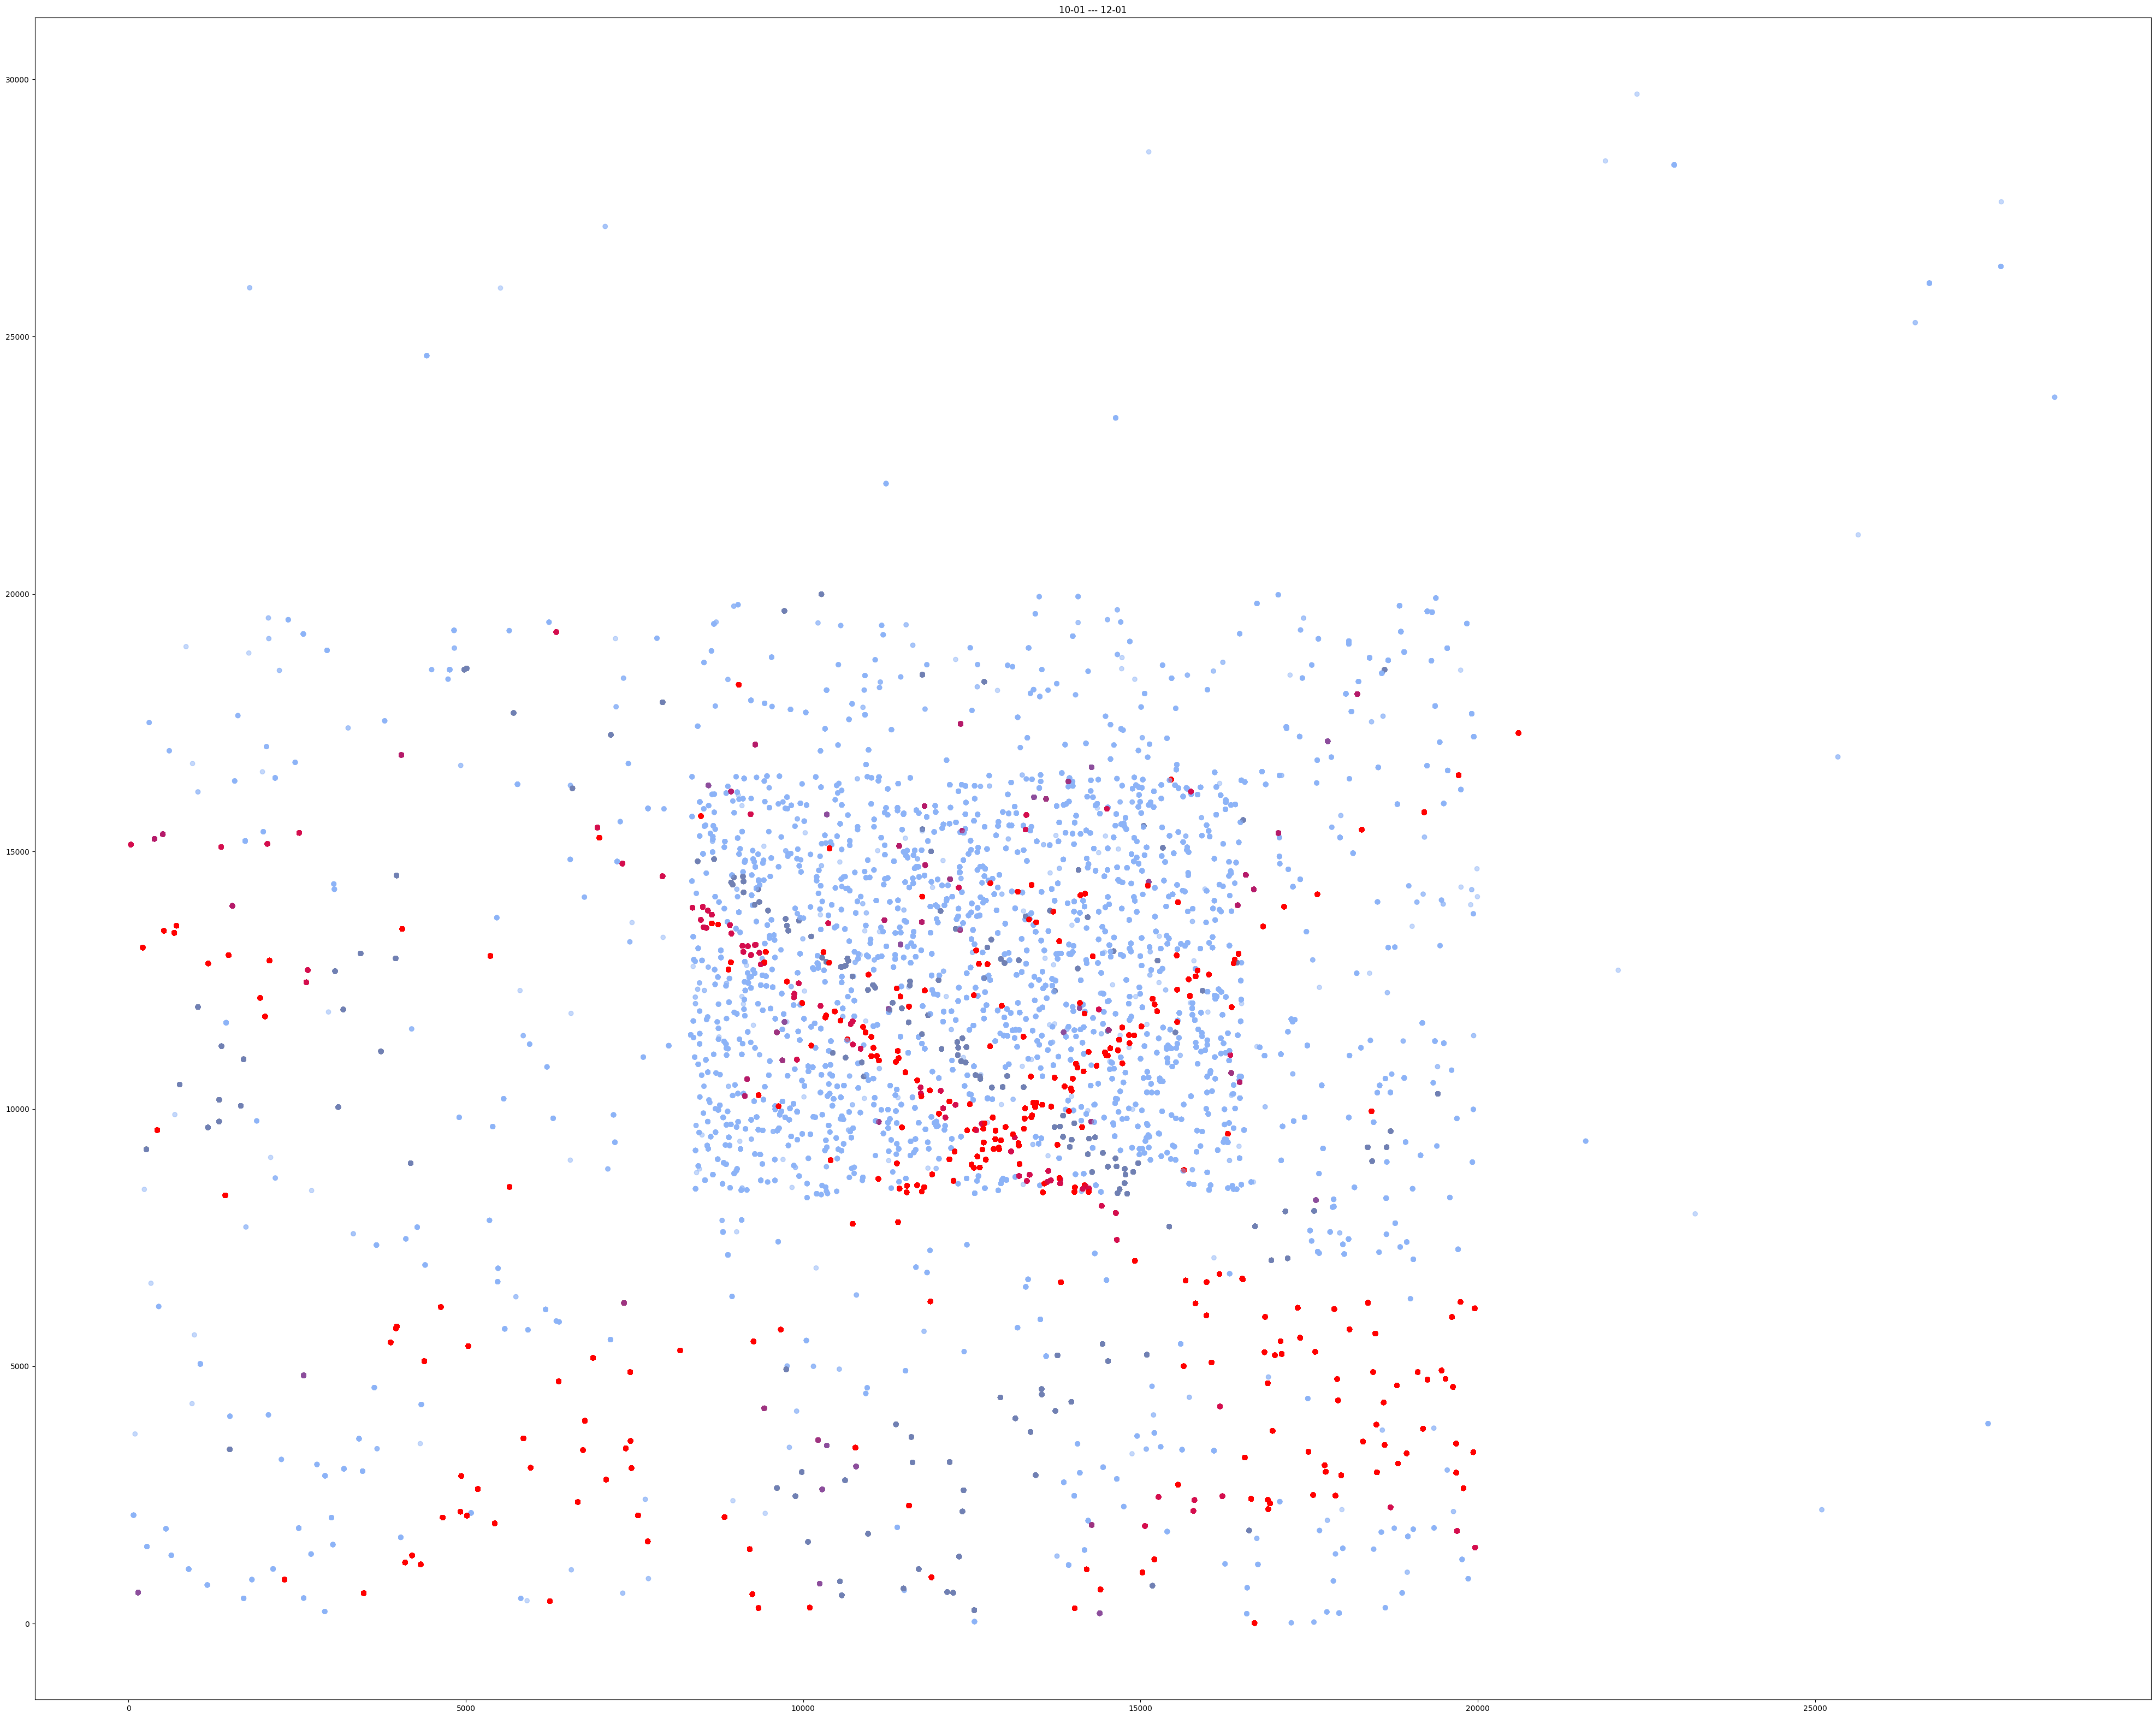

<Figure size 640x480 with 0 Axes>

In [23]:
get_pics(sliced_grid_info)